In [103]:
import pandas as pd
mobile = pd.read_csv('Data/mobile_cleaned.csv')
mobile.drop(columns='time',inplace=True)
# mobile.drop_duplicates(inplace=True).reset_index(drop=True)
mobile.reset_index(drop=True, inplace=True)

print(mobile.mobile_strength.min())
print(mobile.mobile_strength.max())
# we have max and min
# we set a range interval based score for the strength
mobile.mobile_strength = mobile.mobile_strength.div(10)
mobile

13
62


,lat,long,mobile_strength
0,40.112640,-88.218734,3.6
1,40.112646,-88.218679,3.6
2,40.112550,-88.218558,2.9
3,40.112550,-88.218558,2.9
4,40.112550,-88.218558,3.9
...,...,...,...
7202,40.108236,-88.235220,5.1
7203,40.108236,-88.235220,5.1
7204,40.108236,-88.235220,5.1
7205,40.108236,-88.235220,4.8


In [ ]:
! pip install matplotlib numpy pandas seaborn scikit-learn ipython kneed

In [104]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

In [105]:
features = mobile.values.tolist()

In [106]:
features

[[40.1126404, -88.2187338, 3.6],
 [40.1126459, -88.2186793, 3.6],
 [40.1125499, -88.2185581, 2.9],
 [40.1125499, -88.2185581, 2.9],
 [40.1125499, -88.2185581, 3.9],
 [40.1126304, -88.2186581, 2.9],
 [40.1126275, -88.2186938, 2.9],
 [40.1126275, -88.2186938, 2.9],
 [40.1126275, -88.2186938, 2.9],
 [40.1126275, -88.2186938, 2.9],
 [40.1126275, -88.2186938, 2.9],
 [40.1126275, -88.2186938, 2.9],
 [40.1125582, -88.2185611, 2.6],
 [40.1124848, -88.2185649, 2.6],
 [40.1125192, -88.2185701, 2.6],
 [40.1125332, -88.2185694, 2.6],
 [40.112553, -88.2185805, 2.6],
 [40.1125585, -88.2185773, 3.9],
 [40.1125837, -88.2184977, 3.9],
 [40.1125879, -88.2184659, 3.5],
 [40.1126004, -88.2184671, 3.8],
 [40.112508, -88.218291, 3.8],
 [40.1124912, -88.2182848, 3.5],
 [40.1125476, -88.2185661, 3.7],
 [40.1125476, -88.2185661, 3.5],
 [40.1125476, -88.2185661, 3.5],
 [40.1125476, -88.2185661, 3.5],
 [40.1125476, -88.2185661, 3.5],
 [40.1126032, -88.2185755, 3.3],
 [40.1125657, -88.2185645, 3.0],
 [40.1125267,

In [110]:
import numpy as np
kmeans = KMeans(n_clusters=50)
dbscan = DBSCAN(eps=0.003)
features = np.array(features)
kmeans.fit(features)
dbscan.fit(features)

c:\Users\mohan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


DBSCAN(eps=0.003)

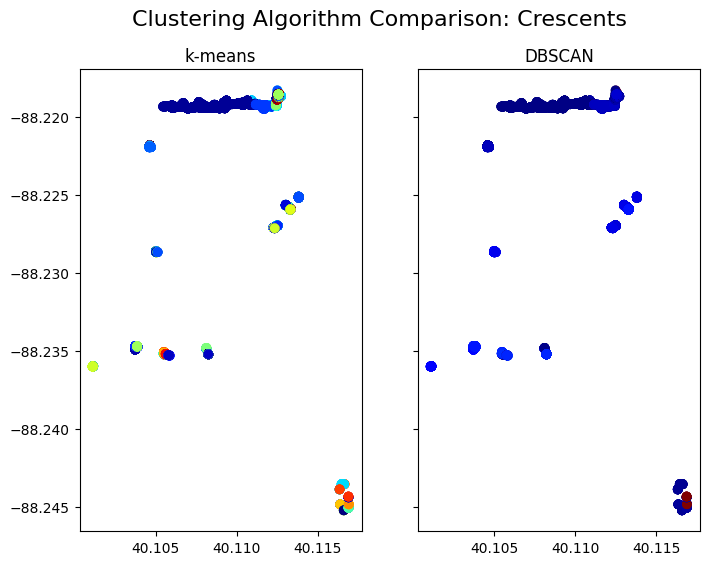

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


numbers = np.arange(1, 501)

cmap = plt.cm.jet

norm = plt.Normalize(vmin=numbers.min(), vmax=numbers.max())

colors = [cmap(norm(num)) for num in numbers]

hex_colors = [mcolors.to_hex(color) for color in colors]

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)

# The k-means plot
km_colors = [hex_colors[label*10] for label in kmeans.labels_]
ax1.scatter(features[:, 0], features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [hex_colors[label] for label in dbscan.labels_]
ax2.scatter(features[:, 0], features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN", fontdict={"fontsize": 12}
)
plt.show()